# **SCRAPPING DATA**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
def scrape_detik(url, min_titles=1000):
    titles = []
    page = 1
    while len(titles) < min_titles:
        full_url = f"{url}?page={page}"
        print("Scraping:", full_url)

        r = requests.get(full_url)
        if r.status_code != 200:
            print("Gagal akses:", full_url)
            break

        soup = BeautifulSoup(r.text, "html.parser")

        # Selector untuk judul
        items = soup.find_all("h2", class_="title")
        if not items:
            print("Tidak ada judul ditemukan di halaman", page)
            break

        for item in items:
            judul = item.get_text(strip=True)
            titles.append(judul)

        page += 1
        time.sleep(1)  # supaya aman

    return titles[:min_titles]

In [ ]:
kategori_urls = {
    "Politik": "https://www.detik.com/tag/politik",
    "Ekonomi": "https://www.detik.com/tag/ekonomi",
    "Olahraga": "https://www.detik.com/tag/olahraga",
    "Selebritas": "https://www.detik.com/tag/seleb",
    "Teknologi": "https://www.detik.com/tag/teknologi"
}

all_data = []
for kategori, url in kategori_urls.items():
    judul_list = scrape_detik(url, min_titles=1000)
    for j in judul_list:
        all_data.append({"JUDUL": j, "KATEGORI": kategori})

df = pd.DataFrame(all_data)

df.to_csv("berita_detik_5_kategori.csv", index=False, encoding="utf-8-sig")

print("Total data:", len(df))
df.head()

Scraping: https://www.detik.com/tag/politik?page=1
Scraping: https://www.detik.com/tag/politik?page=2
Scraping: https://www.detik.com/tag/politik?page=3
Scraping: https://www.detik.com/tag/politik?page=4
Scraping: https://www.detik.com/tag/politik?page=5
Scraping: https://www.detik.com/tag/politik?page=6
Scraping: https://www.detik.com/tag/politik?page=7
Scraping: https://www.detik.com/tag/politik?page=8
Scraping: https://www.detik.com/tag/politik?page=9
Scraping: https://www.detik.com/tag/politik?page=10
Scraping: https://www.detik.com/tag/politik?page=11
Scraping: https://www.detik.com/tag/politik?page=12
Scraping: https://www.detik.com/tag/politik?page=13
Scraping: https://www.detik.com/tag/politik?page=14
Scraping: https://www.detik.com/tag/politik?page=15
Scraping: https://www.detik.com/tag/politik?page=16
Scraping: https://www.detik.com/tag/politik?page=17
Scraping: https://www.detik.com/tag/politik?page=18
Scraping: https://www.detik.com/tag/politik?page=19
Scraping: https://www

,JUDUL,KATEGORI
0,Gerakan Anak Muda dan Politik Musiman,Politik
1,Golkar Nilai Koalisi Permanen Masuk RUU Pemilu...,Politik
2,Keistimewaan Demokrasi Indonesia,Politik
3,"Mobil Ditembaki, Capres Peru Lolos dari Upaya ...",Politik
4,Ineu Ajak Perempuan Muda Berani Masuk Dunia Po...,Politik


# **PRE PROCESSING**

# Langkah 1 – Import Library & Load Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("berita_detik_5_kategori.csv")
df.head()

,JUDUL,KATEGORI
0,Gerakan Anak Muda dan Politik Musiman,Politik
1,Golkar Nilai Koalisi Permanen Masuk RUU Pemilu...,Politik
2,Keistimewaan Demokrasi Indonesia,Politik
3,"Mobil Ditembaki, Capres Peru Lolos dari Upaya ...",Politik
4,Ineu Ajak Perempuan Muda Berani Masuk Dunia Po...,Politik


# Langkah 2 – Cek & Bersihkan Data Kosong/Duplikat

In [ ]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JUDUL     5000 non-null   object
 1   KATEGORI  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [ ]:
df["KATEGORI"].value_counts()

,count
KATEGORI,
Politik,1000
Ekonomi,1000
Olahraga,1000
Selebritas,1000
Teknologi,1000


In [ ]:
# Cek nilai kosong dan duplikat
print("Missing values:", df.isnull().sum().sum())
print("Duplikat:", df.duplicated().sum())

Missing values: 0
Duplikat: 1553


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Cek ulang jumlah data
print("Jumlah data setelah dibersihkan:", len(df))

Jumlah data setelah dibersihkan: 3447


In [ ]:
print("Duplikat:", df.duplicated().sum())

Duplikat: 0


# Langkah 3 – Ubah ke Huruf Kecil (Lowercase)

In [ ]:
# Pastikan semua nilai bertipe string dulu
df["JUDUL"] = df["JUDUL"].astype(str)

# Ubah semuanya ke huruf kecil
df["JUDUL"] = df["JUDUL"].str.lower()

# Cek lagi
(df["JUDUL"].str.islower()).value_counts()

,count
JUDUL,
True,3447


In [ ]:
df["JUDUL"].head(10)

,JUDUL
0,gerakan anak muda dan politik musiman
1,golkar nilai koalisi permanen masuk ruu pemilu...
2,keistimewaan demokrasi indonesia
3,"mobil ditembaki, capres peru lolos dari upaya ..."
4,ineu ajak perempuan muda berani masuk dunia po...
5,puan soroti peran legislator sebagai jembatan ...
6,momen petinggi parpol non parlemen kumpul di k...
7,"pakai sarung-peci, kaesang sowan ke cak imin d..."
8,relawan prabowo-gibran penuhi stadion gelora d...
9,begini situasi kampanye akbar ganjar pranowo d...


# Langkah 4 – Hapus Simbol, Tanda Baca, dan Angka

In [ ]:
import re

df["JUDUL"] = df["JUDUL"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
df["JUDUL"].sample(10)

,JUDUL
1649,pengusaha ungkap impor barang kebutuhan indust...
317,gibran dukung rencana pertemuan prabowomegawat...
630,analisis bos ppi soal ridwan kamil otw jakarta...
1271,bahlil yakin pemudik bisa dorong perputaran ek...
3162,ayu ting ting dan muhammad fardhana sudah putus
839,respons indikator pan all out majukan bima ary...
3507,putuskan lepas cadar ini permintaan inara ke n...
1511,begini ramalan pemprov soal ekonomi jakarta us...
3093,tahun tutupi kdrt suami cut intan ungkap alas...
1868,dukung ekosistem kewirausahaan lewat talenta w...


In [ ]:
cek = df[df["JUDUL"].str.contains(r'[^a-zA-Z\s]', regex=True)]
print("Jumlah baris yang masih kotor:", len(cek))

Jumlah baris yang masih kotor: 0


# Langkah 5 – Tokenisasi

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <--- tambahkan ini

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["tokens"] = df["JUDUL"].apply(nltk.word_tokenize)
df.head()

,JUDUL,KATEGORI,tokens
0,gerakan anak muda dan politik musiman,Politik,"[gerakan, anak, muda, dan, politik, musiman]"
1,golkar nilai koalisi permanen masuk ruu pemilu...,Politik,"[golkar, nilai, koalisi, permanen, masuk, ruu,..."
2,keistimewaan demokrasi indonesia,Politik,"[keistimewaan, demokrasi, indonesia]"
3,mobil ditembaki capres peru lolos dari upaya p...,Politik,"[mobil, ditembaki, capres, peru, lolos, dari, ..."
4,ineu ajak perempuan muda berani masuk dunia po...,Politik,"[ineu, ajak, perempuan, muda, berani, masuk, d..."


# Langkah 6 – Hapus Stopwords Bahasa Indonesia

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

df["stopwords"] = df["tokens"].apply(lambda x: [w for w in x if w not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,JUDUL,KATEGORI,tokens,stopwords
0,gerakan anak muda dan politik musiman,Politik,"[gerakan, anak, muda, dan, politik, musiman]","[gerakan, anak, muda, politik, musiman]"
1,golkar nilai koalisi permanen masuk ruu pemilu...,Politik,"[golkar, nilai, koalisi, permanen, masuk, ruu,...","[golkar, nilai, koalisi, permanen, masuk, ruu,..."
2,keistimewaan demokrasi indonesia,Politik,"[keistimewaan, demokrasi, indonesia]","[keistimewaan, demokrasi, indonesia]"
3,mobil ditembaki capres peru lolos dari upaya p...,Politik,"[mobil, ditembaki, capres, peru, lolos, dari, ...","[mobil, ditembaki, capres, peru, lolos, upaya,..."
4,ineu ajak perempuan muda berani masuk dunia po...,Politik,"[ineu, ajak, perempuan, muda, berani, masuk, d...","[ineu, ajak, perempuan, muda, berani, masuk, d..."


In [ ]:
sisa = {word for stopwords in df["stopwords"] for word in stopwords if word in stop_words}
print("Stopwords tersisa:", sisa)

Stopwords tersisa: set()


# Langkah 7 – Stemming Bahasa Indonesia

In [ ]:
!pip install Sastrawi
# 1️⃣ Import library stemmer Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 2️⃣ Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3️⃣ Terapkan stemming pada token yang sudah dibersihkan
# Ubah setiap token jadi kata dasar lalu gabungkan kembali jadi kalimat
df["stemmed"] = df["stopwords"].apply(lambda x: " ".join([stemmer.stem(word) for word in x]))

# 4️⃣ Tampilkan hasil untuk memastikan kolom stemmed muncul setelah tokens
df = df[["JUDUL", "KATEGORI", "tokens", "stopwords", "stemmed"]]

# 5️⃣ Lihat hasil awal
df.head(10)

,JUDUL,KATEGORI,tokens,stopwords,stemmed
0,gerakan anak muda dan politik musiman,Politik,"[gerakan, anak, muda, dan, politik, musiman]","[gerakan, anak, muda, politik, musiman]",gera anak muda politik musim
1,golkar nilai koalisi permanen masuk ruu pemilu...,Politik,"[golkar, nilai, koalisi, permanen, masuk, ruu,...","[golkar, nilai, koalisi, permanen, masuk, ruu,...",golkar nilai koalisi permanen masuk ruu milu b...
2,keistimewaan demokrasi indonesia,Politik,"[keistimewaan, demokrasi, indonesia]","[keistimewaan, demokrasi, indonesia]",istimewa demokrasi indonesia
3,mobil ditembaki capres peru lolos dari upaya p...,Politik,"[mobil, ditembaki, capres, peru, lolos, dari, ...","[mobil, ditembaki, capres, peru, lolos, upaya,...",mobil tembak capres peru lolos upaya bunuh
4,ineu ajak perempuan muda berani masuk dunia po...,Politik,"[ineu, ajak, perempuan, muda, berani, masuk, d...","[ineu, ajak, perempuan, muda, berani, masuk, d...",ineu ajak perempuan muda berani masuk dunia po...
5,puan soroti peran legislator sebagai jembatan ...,Politik,"[puan, soroti, peran, legislator, sebagai, jem...","[puan, soroti, peran, legislator, jembatan, po...",puan sorot peran legislator jembatan politik i...
6,momen petinggi parpol non parlemen kumpul di k...,Politik,"[momen, petinggi, parpol, non, parlemen, kumpu...","[momen, petinggi, parpol, non, parlemen, kumpu...",momen petinggi parpol non parlemen kumpul diam...
7,pakai sarungpeci kaesang sowan ke cak imin di ...,Politik,"[pakai, sarungpeci, kaesang, sowan, ke, cak, i...","[pakai, sarungpeci, kaesang, sowan, cak, imin,...",pakai sarungpeci kaesang sowan cak imin dpp pkb
8,relawan prabowogibran penuhi stadion gelora de...,Politik,"[relawan, prabowogibran, penuhi, stadion, gelo...","[relawan, prabowogibran, penuhi, stadion, gelo...",rawan prabowogibran penuh stadion gelora delta...
9,begini situasi kampanye akbar ganjar pranowo d...,Politik,"[begini, situasi, kampanye, akbar, ganjar, pra...","[situasi, kampanye, akbar, ganjar, pranowo, go...",situasi kampanye akbar ganjar pranowo gor delt...


# Langkah 8 – Simpan Data Hasil Preprocessing

In [ ]:
df.to_csv("berita_clean.csv", index=False, encoding="utf-8-sig")
print("Data hasil preprocessing berhasil disimpan sebagai berita_clean.csv")

Data hasil preprocessing berhasil disimpan sebagai berita_clean.csv


# Langkah 9 – Cek Distribusi Kategori

In [ ]:
df["KATEGORI"].value_counts()

,count
KATEGORI,
Politik,838
Olahraga,666
Ekonomi,665
Teknologi,664
Selebritas,614


# **FEATURE EXTRACTION**

# Langkah 1 — Import dan Cek Data

In [ ]:
import pandas as pd

# Baca dataset hasil preprocessing
df = pd.read_csv("/content/berita_clean.csv")

# Cek 5 data pertama
df.head()

,JUDUL,KATEGORI,tokens,stopwords,stemmed
0,gerakan anak muda dan politik musiman,Politik,"['gerakan', 'anak', 'muda', 'dan', 'politik', ...","['gerakan', 'anak', 'muda', 'politik', 'musiman']",gera anak muda politik musim
1,golkar nilai koalisi permanen masuk ruu pemilu...,Politik,"['golkar', 'nilai', 'koalisi', 'permanen', 'ma...","['golkar', 'nilai', 'koalisi', 'permanen', 'ma...",golkar nilai koalisi permanen masuk ruu milu b...
2,keistimewaan demokrasi indonesia,Politik,"['keistimewaan', 'demokrasi', 'indonesia']","['keistimewaan', 'demokrasi', 'indonesia']",istimewa demokrasi indonesia
3,mobil ditembaki capres peru lolos dari upaya p...,Politik,"['mobil', 'ditembaki', 'capres', 'peru', 'lolo...","['mobil', 'ditembaki', 'capres', 'peru', 'lolo...",mobil tembak capres peru lolos upaya bunuh
4,ineu ajak perempuan muda berani masuk dunia po...,Politik,"['ineu', 'ajak', 'perempuan', 'muda', 'berani'...","['ineu', 'ajak', 'perempuan', 'muda', 'berani'...",ineu ajak perempuan muda berani masuk dunia po...


# Langkah 2 - Gunakan Kolom Stemmed dan Kategori

In [ ]:
X = df["stemmed"].astype(str)
y = df["KATEGORI"]

# Langkah 3 - TF-IDF Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # ambil 5000 kata paling penting

# Transformasi data latih dan uji
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Bentuk data TF-IDF:", X_train_tfidf.shape)

Shape TF-IDF Matrix: (3447, 4380)


# Langkah 4 - Encode Label

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(label_encoder.classes_)

['Ekonomi' 'Olahraga' 'Politik' 'Selebritas' 'Teknologi']


# Langkah 5 - Save TF-IDF & Label Encoder

In [ ]:
import joblib

joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Saved: tfidf_vectorizer.pkl dan label_encoder.pkl")

Saved: tfidf_vectorizer.pkl dan label_encoder.pkl


# **LSTM**

# Langkah 1 - Load Dataset

In [ ]:
import pandas as pd

# Baca dataset hasil preprocessing
df = pd.read_csv("/content/berita_clean.csv")

# Cek 5 data pertama
df.head()

,JUDUL,KATEGORI,tokens,stopwords,stemmed
0,gerakan anak muda dan politik musiman,Politik,"['gerakan', 'anak', 'muda', 'dan', 'politik', ...","['gerakan', 'anak', 'muda', 'politik', 'musiman']",gera anak muda politik musim
1,golkar nilai koalisi permanen masuk ruu pemilu...,Politik,"['golkar', 'nilai', 'koalisi', 'permanen', 'ma...","['golkar', 'nilai', 'koalisi', 'permanen', 'ma...",golkar nilai koalisi permanen masuk ruu milu b...
2,keistimewaan demokrasi indonesia,Politik,"['keistimewaan', 'demokrasi', 'indonesia']","['keistimewaan', 'demokrasi', 'indonesia']",istimewa demokrasi indonesia
3,mobil ditembaki capres peru lolos dari upaya p...,Politik,"['mobil', 'ditembaki', 'capres', 'peru', 'lolo...","['mobil', 'ditembaki', 'capres', 'peru', 'lolo...",mobil tembak capres peru lolos upaya bunuh
4,ineu ajak perempuan muda berani masuk dunia po...,Politik,"['ineu', 'ajak', 'perempuan', 'muda', 'berani'...","['ineu', 'ajak', 'perempuan', 'muda', 'berani'...",ineu ajak perempuan muda berani masuk dunia po...


# Langkah 2 - Gunakan kolom stemmed sebagai input text

In [ ]:
df["text_joined"] = df["stemmed"]
X = df["text_joined"]
y = df["KATEGORI"]

# Langkah 3 - Tokenizing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)

vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)

Vocab size: 5651


# Langkah 4 - Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(len(s) for s in X_seq)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')
print("Max Length:", max_len)

Max Length: 14


# Langkah 5 - Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

y_cat = to_categorical(y_encoded, num_classes=num_classes)

# Langkah 6 - Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_cat
)

# Langkah 7 - Build LSTM model

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dropout, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Langkah 8 - Train model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.2548 - loss: 1.5897 - val_accuracy: 0.4982 - val_loss: 1.0824
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7314 - loss: 0.7312 - val_accuracy: 0.8062 - val_loss: 0.6353
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9344 - loss: 0.2056 - val_accuracy: 0.8261 - val_loss: 0.5471
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9791 - loss: 0.0721 - val_accuracy: 0.8478 - val_loss: 0.5657
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9871 - loss: 0.0452 - val_accuracy: 0.8406 - val_loss: 0.7502
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9969 - loss: 0.0201 - val_accuracy: 0.8460 - val_loss: 0.7702
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9979 - loss: 0.0156 - val_accuracy: 0.8261 - val_loss: 0.9185
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9982 - loss: 0.0087 - val_accuracy: 0.8388 - v

# Langkah 9 - Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Prediksi kelas untuk test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Buat classification report
report = classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=label_encoder.classes_
)
print(report)

loss, acc = model.evaluate(X_test, y_test)
print("Akurasi Test:", round(acc * 100, 2), "%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
              precision    recall  f1-score   support

     Ekonomi       0.88      0.77      0.82       133
    Olahraga       0.88      0.85      0.86       133
     Politik       0.87      0.93      0.90       168
  Selebritas       0.79      0.86      0.82       123
   Teknologi       0.82      0.80      0.81       133

    accuracy                           0.85       690
   macro avg       0.85      0.84      0.84       690
weighted avg       0.85      0.85      0.85       690

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8303 - loss: 0.9512
Akurasi Test: 84.78 %


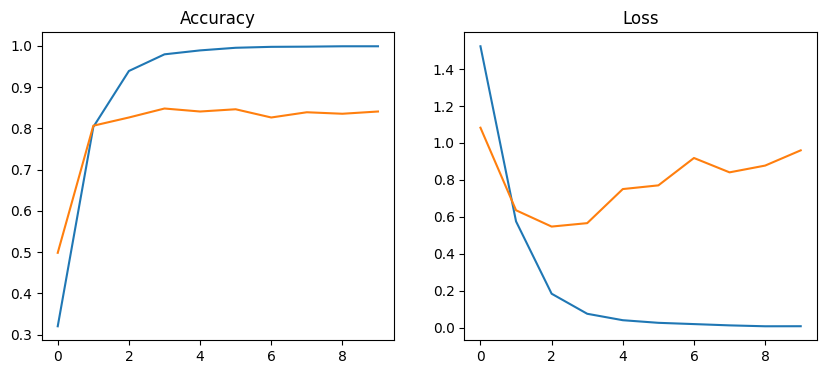

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

plt.show()


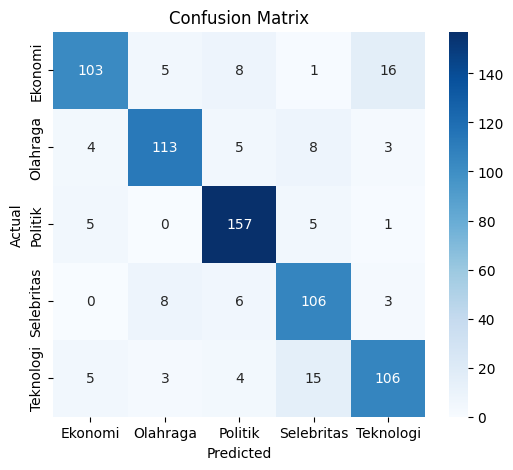

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Buat confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Langkah 10 - Simpan Model + Tokenizer + label Encoder

In [ ]:
import json
import joblib

# Simpan tokenizer
tokenizer_json = tokenizer.to_json()
with open("tokenizer_lstm.json", "w") as f:
    f.write(tokenizer_json)

# Simpan label encoder
joblib.dump(label_encoder, "label_encoder_lstm.pkl")

# Simpan model
model.export("model_lstm")
model.save("model_lstm.h5")

print("Model, tokenizer, dan label encoder berhasil disimpan!")

Saved artifact at 'model_lstm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 14), dtype=tf.float32, name='keras_tensor_13')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  133318450739920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318450738576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318450740112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318709446032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318433302160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318709446224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318450738384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318709447568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318709447760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318709445840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133318709448144: TensorSpe

In [ ]:
import shutil

shutil.make_archive("model_lstm", "zip", "model_lstm")

'/content/model_lstm.zip'

# **DISTILBERT**

# Langkah 1 - Import & Load Data

In [ ]:
!pip install transformers datasets torch scikit-learn --quiet

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import TrainingArguments, Trainer
import evaluate
import torch

In [ ]:
df = pd.read_csv("berita_clean.csv")
df = df[['stemmed', 'KATEGORI']]

# Langkah 2 - Encode label jadi integer

In [ ]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["KATEGORI"])
num_labels = df["label"].nunique()

# Langkah 3 - Split Train & Test

In [ ]:
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["label"]
)

# Langkah 4 - Convert ke HuggingFace Dataset

In [ ]:
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# Langkah 5 - Tokenizer DistilBERT Indonesia

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained("cahya/distilbert-base-indonesian")

def tokenize(batch):
    return tokenizer(
        batch["stemmed"],
        padding="max_length",
        truncation=True,
        max_length=64
    )

train_tokenized = train_ds.map(tokenize, batched=True)
test_tokenized = test_ds.map(tokenize, batched=True)

# Set format dataset ke PyTorch
train_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/2757 [00:00<?, ? examples/s]

Map:   0%|          | 0/690 [00:00<?, ? examples/s]

# Langkah 6 - Model

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(
    "cahya/distilbert-base-indonesian",
    num_labels=num_labels
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at cahya/distilbert-base-indonesian and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Langkah 7 - Training Arguments

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",   # <- versi lama
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=20,
    report_to="none"
)

# Langkah 8 - Metrics

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # jika logits tuple, ambil elemen pertama
    if isinstance(logits, tuple):
        logits = logits[0]

    # convert ke numpy
    if torch.is_tensor(logits):
        logits = logits.detach().cpu().numpy()
    if torch.is_tensor(labels):
        labels = labels.detach().cpu().numpy()

    preds = logits.argmax(axis=-1)
    return accuracy_metric.compute(predictions=preds, references=labels)


# Langkah 8 - Training

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
trainer.train()

/tmp/ipython-input-650390036.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'pad_token_id': 2}.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,0.380100,0.373445,0.888406
2,0.233800,0.357050,0.894203
3,0.097600,0.377734,0.900000


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=519, training_loss=0.332623319589104, metrics={'train_runtime': 3198.5464, 'train_samples_per_second': 2.586, 'train_steps_per_second': 0.162, 'total_flos': 136962058965120.0, 'train_loss': 0.332623319589104, 'epoch': 3.0})

# Langkah 9 - Evaluasi

In [ ]:
results = trainer.evaluate()
print("Akurasi DistilBERT :", results["eval_accuracy"])

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Akurasi DistilBERT : 0.9


# Langkah 10 - Save Model

In [ ]:
import os
import joblib

SAVE_DIR = "model_distilbert"
os.makedirs(SAVE_DIR, exist_ok=True)

model.save_pretrained(
    SAVE_DIR,
    safe_serialization=False   # ⬅️ INI KUNCI UTAMA
)

tokenizer.save_pretrained(SAVE_DIR)

joblib.dump(le, f"{SAVE_DIR}/label_encoder.pkl")

print("Model, tokenizer, dan label encoder berhasil disimpan!")

Model, tokenizer, dan label encoder berhasil disimpan!


In [ ]:
import shutil

zip_path = shutil.make_archive(
    base_name="model_distilbert",
    format="zip",
    root_dir="model_distilbert"
)

print("ZIP dibuat di:", zip_path)

ZIP dibuat di: /content/model_distilbert.zip


# **INDOBERT**

# Langkah 1 - Install library

In [ ]:
!pip install transformers datasets torch scikit-learn --quiet

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
import torch
from sklearn.preprocessing import LabelEncoder

# Langkah 2 - Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("berita_clean.csv")
df = df[['stemmed', 'KATEGORI']]
df.head()

,stemmed,KATEGORI
0,gera anak muda politik musim,Politik
1,golkar nilai koalisi permanen masuk ruu milu b...,Politik
2,istimewa demokrasi indonesia,Politik
3,mobil tembak capres peru lolos upaya bunuh,Politik
4,ineu ajak perempuan muda berani masuk dunia po...,Politik


# Langkah 3 - Encode Label

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["KATEGORI"])
num_labels = df["label"].nunique()

df.head()

,stemmed,KATEGORI,label
0,gera anak muda politik musim,Politik,2
1,golkar nilai koalisi permanen masuk ruu milu b...,Politik,2
2,istimewa demokrasi indonesia,Politik,2
3,mobil tembak capres peru lolos upaya bunuh,Politik,2
4,ineu ajak perempuan muda berani masuk dunia po...,Politik,2


# Langkah 4 - Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

train_df.shape, test_df.shape

((2757, 3), (690, 3))

# Langkah 5 - Convert ke Dataset HuggingFace

In [ ]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# Langkah 6 - Load Tokenizer IndoBERT

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

# Langkah 7 - Tokenisasi Dataset

In [ ]:
def tokenize(batch):
    return tokenizer(
        batch["stemmed"],
        padding="max_length",
        truncation=True,
        max_length=64
    )

train_tokenized = train_ds.map(tokenize, batched=True)
test_tokenized = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/2757 [00:00<?, ? examples/s]

Map:   0%|          | 0/690 [00:00<?, ? examples/s]

# Langkah 8 - Load Model IndoBERT

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=num_labels
)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Langkah 9 - TrainingArguments

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",      # pengganti evaluation_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=20,
    report_to="none"            # matikan wandb otomatis
)

# Langkah 10 - Metric Akurasi (pakai evaluate)

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 419.5 kB/s eta 0:00:00


In [ ]:
import evaluate

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Langkah 11 - Trainer

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-397979581.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


# Langkah 12 - Train Model

In [ ]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,0.342600,0.318949,0.905797
2,0.200900,0.323937,0.910145
3,0.051400,0.374242,0.911594


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=519, training_loss=0.2666188434828683, metrics={'train_runtime': 6736.0703, 'train_samples_per_second': 1.228, 'train_steps_per_second': 0.077, 'total_flos': 272031269539968.0, 'train_loss': 0.2666188434828683, 'epoch': 3.0})

# Langkah 13 - Evaluasi Akurasi

In [ ]:
results = trainer.evaluate()
print("Akurasi IndoBERT :", results["eval_accuracy"])

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Akurasi IndoBERT : 0.9115942028985508


# Langkah 14 - Save Model

In [ ]:
import os
import joblib

SAVE_DIR = "saved_model_indobert"
os.makedirs(SAVE_DIR, exist_ok=True)

model.save_pretrained(
    SAVE_DIR,
    safe_serialization=False   # ⬅️ INI KUNCI UTAMA
)

tokenizer.save_pretrained(SAVE_DIR)

joblib.dump(le, f"{SAVE_DIR}/label_encoder.pkl")

print("✅ Model, tokenizer, dan label encoder berhasil disimpan!")


✅ Model, tokenizer, dan label encoder berhasil disimpan!


In [ ]:
import shutil

shutil.make_archive("saved_model_indobert", "zip", "saved_model_indobert")

'/content/saved_model_indobert.zip'

In [ ]:
import shutil
from google.colab import files

zip_path = shutil.make_archive(
    base_name="model_indobert",
    format="zip",
    root_dir="saved_model_indobert"
)

print("ZIP dibuat di:", zip_path)
files.download("model_indobert.zip")

ZIP dibuat di: /content/model_indobert.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Langkah 14 - Fungsi Prediksi

In [ ]:
import torch

def predict(text):
    enc = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=64)
    outputs = model(**enc)
    probs = torch.softmax(outputs.logits, dim=1)
    pred_class = probs.argmax().item()

    kategori = le.inverse_transform([pred_class])[0]
    confidence = float(probs[0][pred_class])

    return kategori, confidence

In [ ]:
predict("timnas indonesia menang lawan australia")

/tmp/ipython-input-1252252447.py:10: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  confidence = float(probs[0][pred_class])


('Olahraga', 0.9960519671440125)

In [ ]:
predict("parbowo gibran turun langsung ke medan banjir")

('Politik', 0.9699291586875916)